In [1]:
import pyrosetta; pyrosetta.init()
from pyrosetta import *
init()
from pyrosetta.toolbox import pose_from_rcsb
from pyrosetta.toolbox import cleanATOM
from pyrosetta.teaching import *
from pyrosetta import PyMOLMover
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from split_energy import energy_intervals
from split_energy import split_energy
from split_energy import plot
import IPython

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python312.mac 2024.35+release.45abd6ab3e15d27b06950672a1bb868f76c03266 2024-08-28T11:40:28] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python312.mac r385 2024.35+release.45abd6ab3e 45abd6ab3e15d27b

In [7]:
pmm = PyMOLMover()
pmm.apply(dhfr)

core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard residue type set.  Created 985 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 1.75667 seconds.
core.import_pose.import_pose: File '4CQH.clean.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue GLU 16
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE1 on residue GLU 16
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE2 on residue GLU 16
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue GLN 88
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue GLN 88
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE1 on residue GLN 88
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NE2 on residue GLN 88
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue ASP 89
core.conformation.Confor

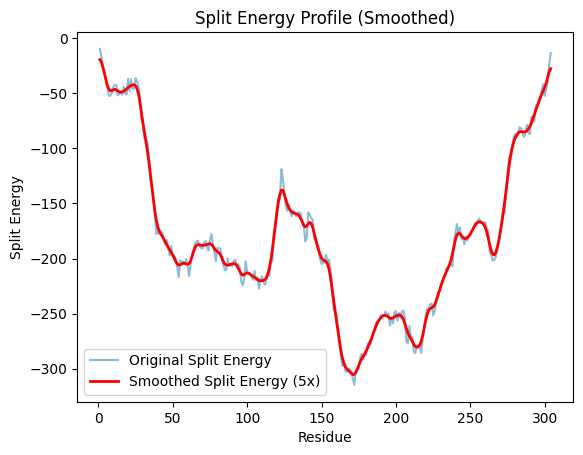

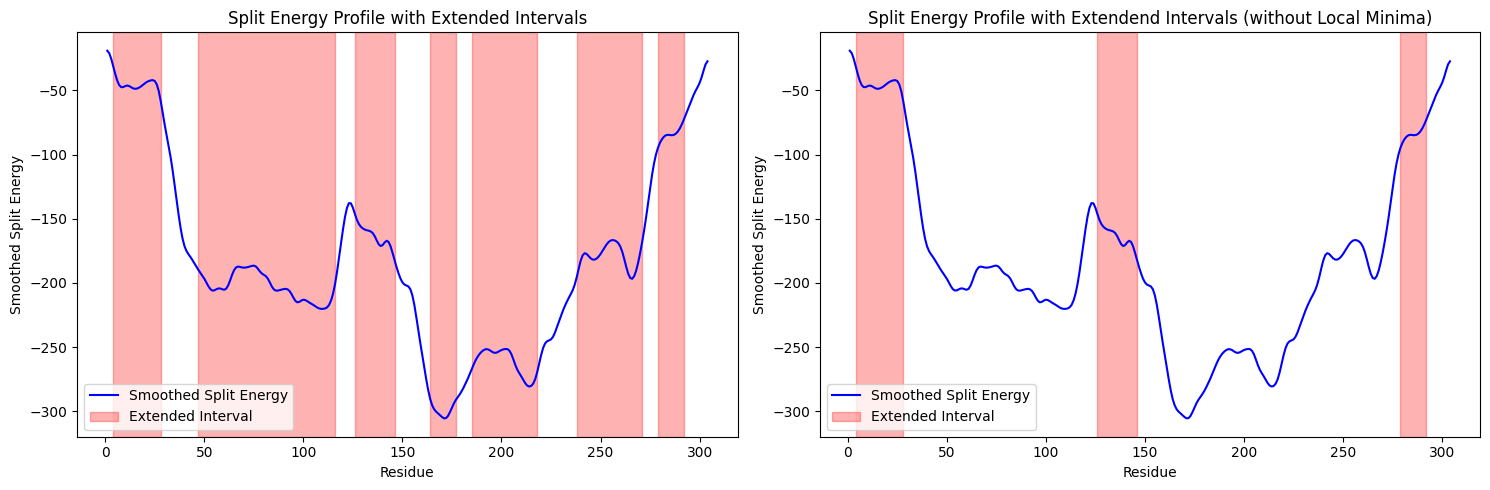

In [2]:
ifp, se_ifp = split_energy("4CQH")
plot(se_ifp)
merged_ifp, filtered_ifp = energy_intervals(se_ifp)
plot(se_ifp, merged_intervals=merged_ifp, filtered_intervals=filtered_ifp, type ='intervals')

core.import_pose.import_pose: File '1GFL.clean.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  O   on residue SER 65
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue THR:CtermProteinFull 230
core.conformation.Conformation: [ WARNING ] missing heavyatom:  O   on residue SER 295
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue THR:CtermProteinFull 460
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015


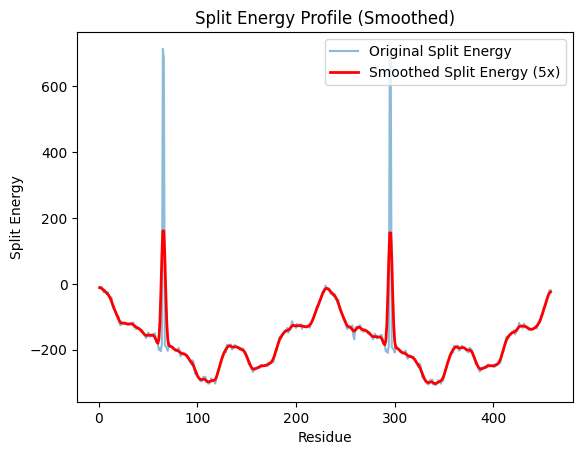

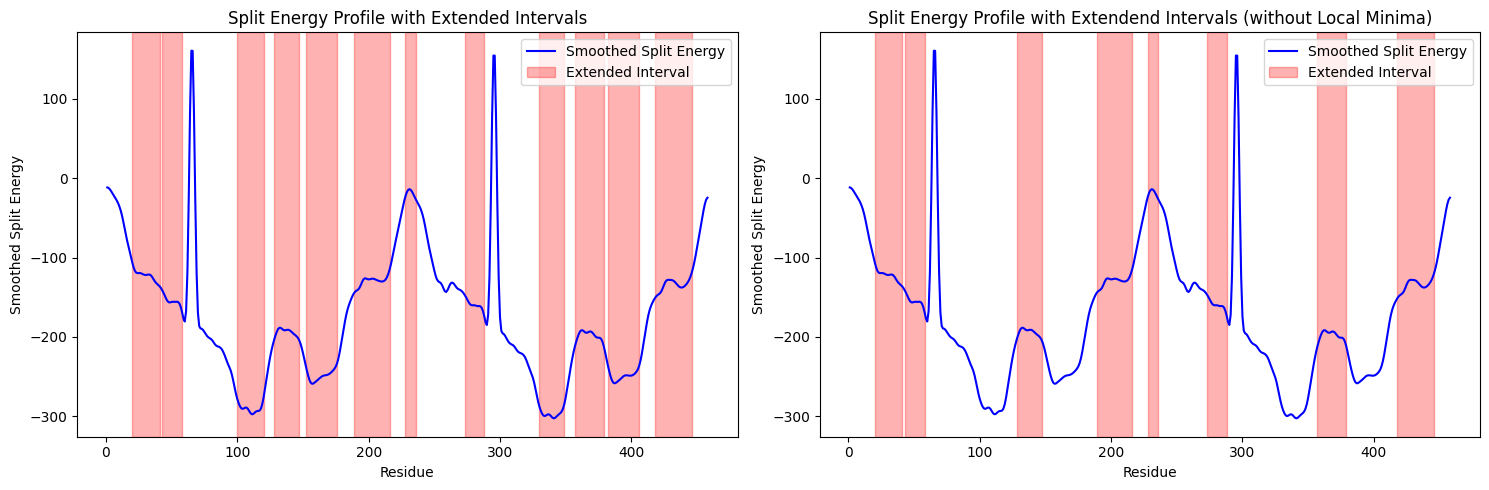

In [3]:
gfp, se_gfp = split_energy("1GFL")
plot(se_gfp)
merged_gfp, filtered_gfp = energy_intervals(se_gfp)
plot(se_gfp, merged_intervals=merged_gfp, filtered_intervals=filtered_gfp, type ='intervals')

core.import_pose.import_pose: File '1UBQ.clean.pdb' automatically determined to be of type PDB
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015


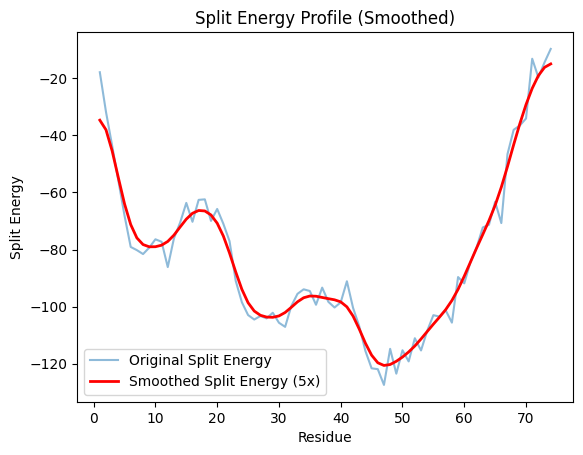

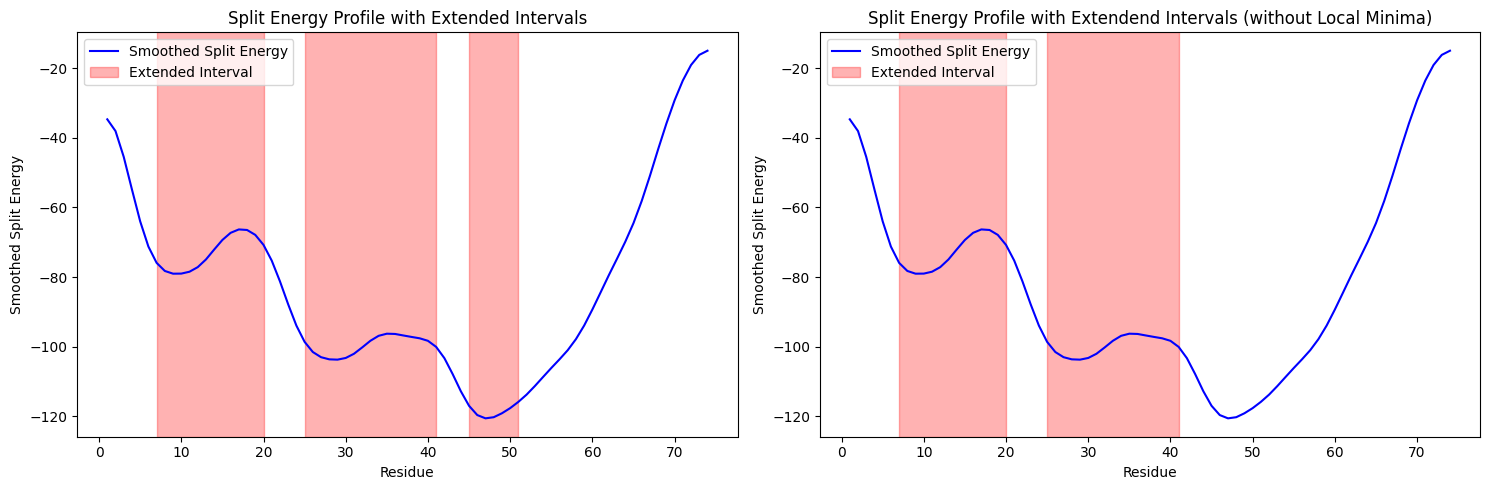

In [9]:
ubq, se_ubq = split_energy("1UBQ")
plot(se_ubq)
merged_ubq, filtered_ubq = energy_intervals(se_ubq)
plot(se_ubq, merged_intervals=merged_ubq, filtered_intervals=filtered_ubq, type ='intervals')

core.import_pose.import_pose: File '1ZG4.clean.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 52 98
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015


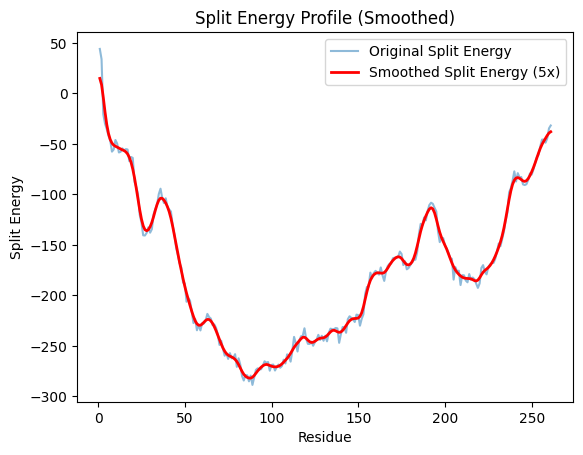

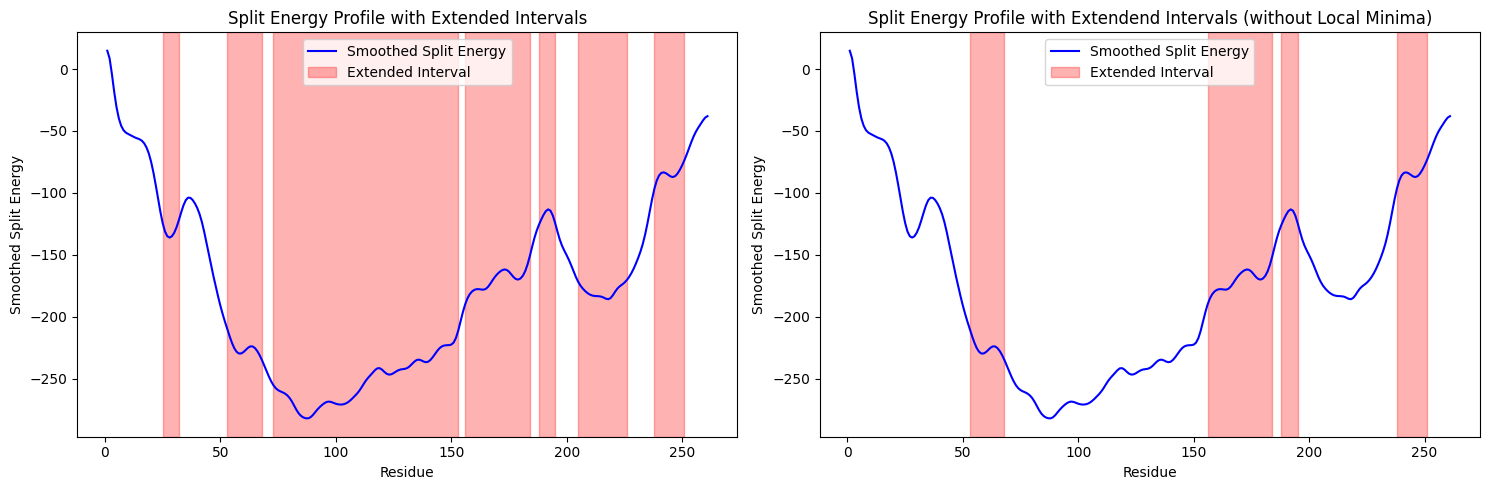

In [3]:
lac, se_lac = split_energy("1ZG4")
plot(se_lac)
merged_lac, filtered_lac = energy_intervals(se_lac)
plot(se_lac, merged_intervals=merged_lac, filtered_intervals=filtered_lac, type ='intervals')